<a href="https://colab.research.google.com/github/SanthoshMoravaneni/linear_regression_bostonhousing/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from sklearn.datasets import fetch_california_housing

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
dataset = fetch_california_housing()

In [25]:
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [26]:
df = pd.DataFrame(dataset.data)
df.columns = dataset.feature_names
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [27]:
df['Price'] = dataset.target

In [28]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# **dividing the dataset into independent and dependent features**


In [29]:
x = df.iloc[:,:-1] ## Independent features
y = df.iloc[:,-1] ## dependent features

In [30]:
x.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [31]:
y.head()

,Price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [34]:
##Linear regression vs SGDRegression
from sklearn.linear_model import LinearRegression
LnReg = LinearRegression()
from sklearn.linear_model import SGDRegressor

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

**Training SGDRegression**

In [36]:
SDGReg = SGDRegressor(max_iter=1000, learning_rate='invscaling', eta0=0.01, random_state=42)
SDGReg.fit(X_train_scaled,y_train)
y_pred = SDGReg.predict(X_test_scaled)


In [37]:
from sklearn.metrics import mean_squared_error , r2_score
MSE_sdg = mean_squared_error(y_test,y_pred)
r_square_sdg = r2_score(y_test,y_pred)


In [38]:
print("SGDRegressor Performance:")
print(f"  MSE: {MSE_sdg}")
print(f"  R² : {r_square_sdg}")

SGDRegressor Performance:
  MSE: 0.5333091271326035
  R² : 0.5930208538035808


# **Train using Linear Regression**
In Linear Regression, we use OLS, which doesn't provide details about gradient descent or learning rate control but SGDRegressor does use gradient descent, allowing us to manipulate learning rate, use the convergence
While both provide R², we compute Adjusted R² manually for both.

In [43]:
LnReg.fit(X_train_scaled,y_train)
y_pred_ln = LnReg.predict(X_test_scaled)
MSE_ln = mean_squared_error(y_test, y_pred_ln)
r_square_ln = r2_score(y_test,y_pred_ln)

print("\nLinearRegression Performance:")
print(f"  MSE: {MSE_ln}")
print(f"  R² : {r_square_ln}")


LinearRegression Performance:
  MSE: 0.5388649914036732
  R² : 0.5887810596909611


Both test have same value approximatly

Insead of testing at once for output , we will first apply the cross-validation and test,here we divide the data into train and test parts in multiple ways. Each and every combination is tried — the model is trained and tested on different splits.

In [49]:
from sklearn.model_selection import cross_val_score
mean_sq_er = cross_val_score(LnReg,x,y,scoring='neg_mean_squared_error',cv=5)

In [50]:
print(mean_sq_er) ## 5 cross validations

[-0.48485857 -0.62249739 -0.64621047 -0.5431996  -0.49468484]


Since these are negative MSE values, a higher (less negative) score is better i.e which has to be closer to 0
*   The highest (best) score is -0.48485857 (fold 1).

In [51]:
mean_mse = np.mean(mean_sq_er) # take average
print(mean_mse)

-0.5582901717686546


In linear Regression, we can't modify much with the parameters , In order to avoid overfiting we use ridge regression, Hyperparameters are the settings you choose before training a machine learning model.
Because the right hyperparameter values can:
Improve model accuracy
*   Improve model accuracy
*   Prevent overfitting or underfitting
*   Help the model generalize better to new data


In [56]:
#Ridge regression(L2 Regulation) -- for hyper parameter tuning
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1e-1,1,2,5,10,20]}

ridg_regression = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridg_regression.fit(x,y)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 0.1, 1, 2,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [57]:
print(ridg_regression.best_params_)
print(ridg_regression.best_score_)

{'alpha': 20}
-0.5581020035625641


In [58]:
#Lasso regression -- for hyper parameter tuning
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
Laso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1e-1,1,2,5,10,20,30,40,50,60,70,55,100]}

laso_regression = GridSearchCV(Laso,parameters,scoring='neg_mean_squared_error',cv=5)
laso_regression.fit(x,y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.875e+03, tolerance: 2.228e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.076e+03, tolerance: 2.256e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.419e+03, tolerance: 2.110e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 0.1, 1, 2,
                                   5, 10, 20, 30, 40, 50, 60, 70, 55, 100]},
             scoring='neg_mean_squared_error')

In [59]:
print(laso_regression.best_params_)
print(laso_regression.best_score_)

{'alpha': 0.001}
-0.558275929386899


The value should go towards ZERO

Linear Regression give me lower MSE and L1 and L2 regulations it has higher values , In this case linear regression perfect best for best fit line. Regulations are mainly used when you expect overfitting and you have some features which making a slight impact on your model but those feature will not make sense for consideration(Feature selection)

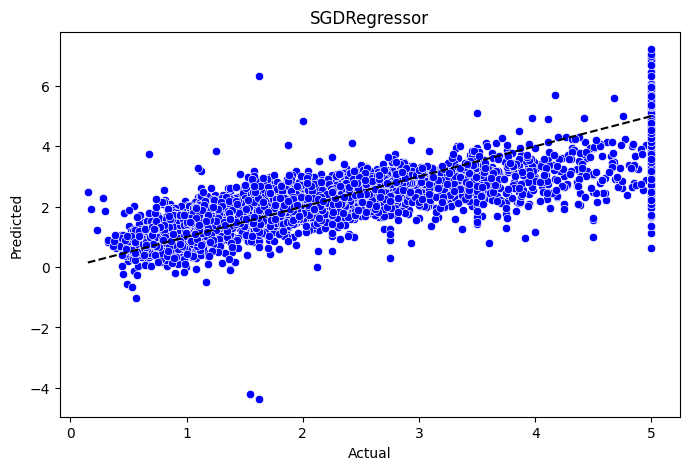

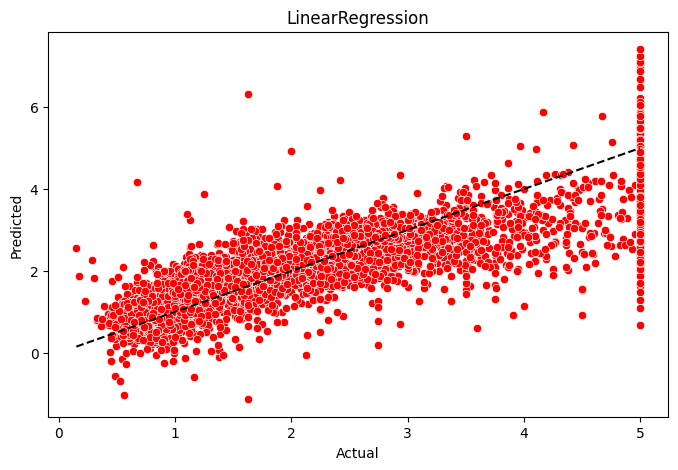

In [71]:
import seaborn as sns

# Prepare separate DataFrames for each model
df_sgd = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_lin = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ln})

# Plot SGD predictions
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Actual', y='Predicted', data=df_sgd,c='b')
plt.plot([df_sgd['Actual'].min(), df_sgd['Actual'].max()],
         [df_sgd['Actual'].min(), df_sgd['Actual'].max()],
         'k--')
plt.title('SGDRegressor')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Plot Linear Regression predictions
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Actual', y='Predicted', data=df_lin,c='r')
plt.plot([df_lin['Actual'].min(), df_lin['Actual'].max()],
         [df_lin['Actual'].min(), df_lin['Actual'].max()],
         'k--')
plt.title('LinearRegression')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()



In [72]:
print("LinearReg: Coef or Slope",LnReg.coef_)
print("LinearReg: Coef or Slope", LnReg.intercept_)

print("-"*10)

print("SDGReg: Coef or Slope",LnReg.coef_)
print("SDGReg: Coef or Slope", LnReg.intercept_)



LinearReg: Coef or Slope [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]
LinearReg: Coef or Slope 2.0719469373788777
----------
SDGReg: Coef or Slope [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]
SDGReg: Coef or Slope 2.0719469373788777
